# **EXPLORATORY DATA ANALYSIS**

## 1. Defining the question

### a) Specifying the question


What day is most popular for taking bluecars? Do people take bluecars more on Friday than on Monday?

### b) Defining the metric for success

Effectively use exploratory data analysis and hypothesis testing to determine whether bluecars are taken more on Fridays than Mondays.

### c) Understanding the context

The hypothesis is interesting as there is a general assumption that electric car sharing services usually have people taking the cars at the start of the weekend, in this case bluecars on Friday and returned on Monday. However, there is no sufficient evidence showing that Friday is the peak day for taking cars and Monday a slower day. The test will show if the claim is true or there is more to it

### d) Recording the experimental design

### e) Data Relevance

The data has all information needed to come to a conclusion based on the hypothesis. The dataset is based over a span of one year which can be used effectively.

# 2. Reading the Data

In [321]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from statsmodels.stats.weightstats import ztest

In [112]:
#loading the dataset
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

# 3. Checking the Data

In [113]:
#Determining number of records in the dataset
df.shape

(16085, 13)

In [114]:
#previewing the top of the dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [115]:
#Previewing the bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [116]:
#checking if each column has the appropriate data type
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [117]:
#Getting information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [118]:
#Checking the column names of the dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [119]:
# Checking number of unique items in each column
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [120]:
#Getting a summary of the dataset
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [121]:
#The research requires that we use data based on the the day type, weekend or weekday. We will use weekdays
#We create a dataset with only weekday values
df = df.loc[df['day_type'] == 'weekday']
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [122]:
#Getting shape of the new dataset
df.shape

(11544, 13)

In [123]:
#Checking for unique values in the day type column
df['day_type'].unique()

array(['weekday'], dtype=object)

# 4. External Data Source Validation

Data source validation was done by looking at information from the source of the dataset. The source of the dataset is Autolib.

# 5. Data Cleaning

In [124]:
#Fixing column names for uniformity
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [125]:
#Renaming the day of the week column
df.rename(columns={'dayofweek' : 'day_of_week'}, inplace=True)

In [126]:
#Looking at column names
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [127]:
#Dropping columns
#The stufy only needs data for blue cars. We then drop columns not related to blue cars
df.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis = 1, inplace = True)

In [128]:
df.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


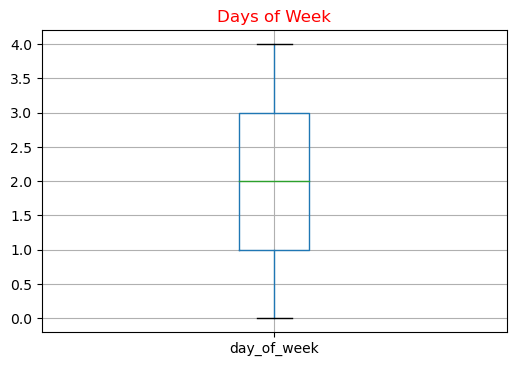

In [129]:
#Checking for outliers in day of week
plt.figure(dpi=100)
df.boxplot(['day_of_week'])
plt.title('Days of Week', color='red')
plt.show()

#There are no outliers. The days of week should be 0-4 denoting Monday to Friday

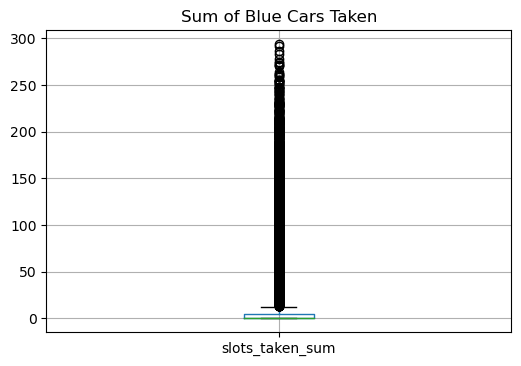

In [130]:
#checking for outliers in respondent age
plt.figure(dpi=100)
df.boxplot(['slots_taken_sum'])
plt.title('Sum of Blue Cars Taken')
plt.show()

#Outliers are kept as they are true values 

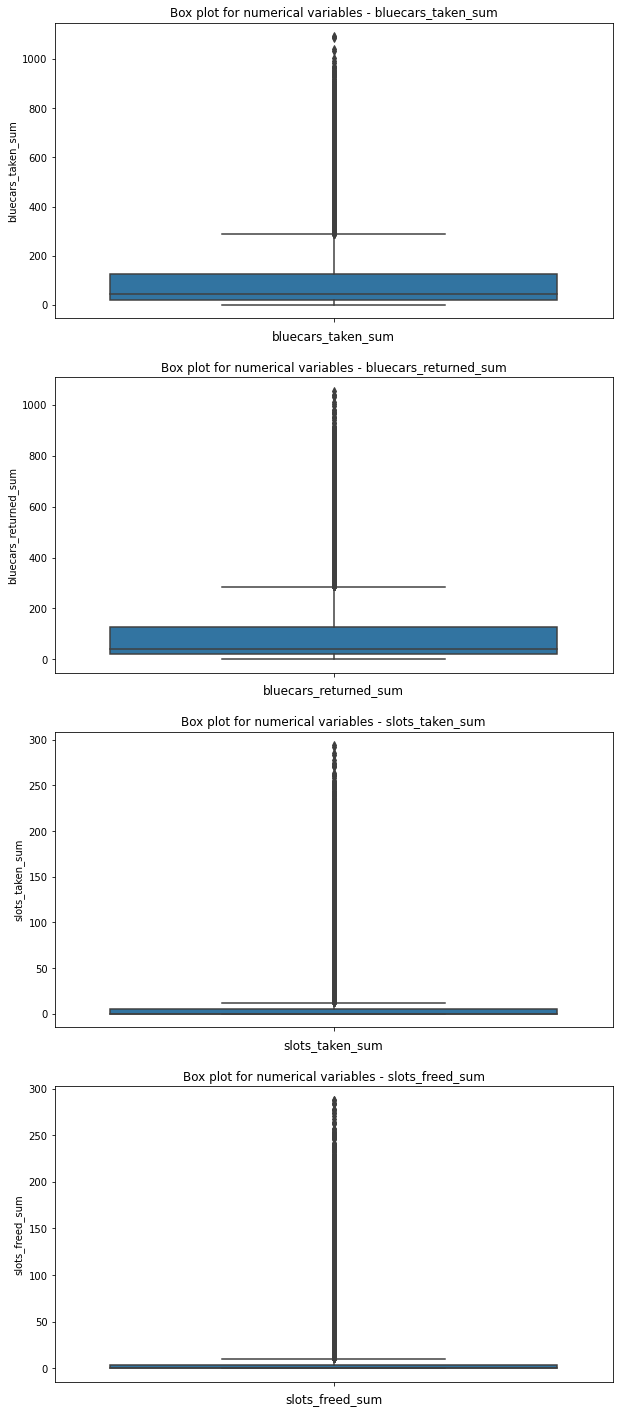

In [131]:
col_names= ['bluecars_taken_sum', 'bluecars_returned_sum', 'slots_taken_sum', 'slots_freed_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

The data shows that there is presence of outliers in the columns. However, the outliers won't be dropped but investigated as they are most likely true values.

In [132]:
#Checking for missing data
df.isna().sum()

postal_code              0
date                     0
n_daily_data_points      0
day_of_week              0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

In [133]:
#Checking for duplicated values
df.duplicated().sum()

0

# 6. Exploratory Data Analysis

## 6.1 Univariate Data Analysis

In [134]:
#For plotting purposes, we will convert the number of days to their string values
df['day_of_week'] = df.day_of_week.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

In [138]:
#Previewing the implemented changes
df.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


In [139]:
#Looking at the number of days
df['day_of_week'].value_counts()

Monday       2374
Tuesday      2363
Friday       2271
Thursday     2268
Wednesday    2268
Name: day_of_week, dtype: int64

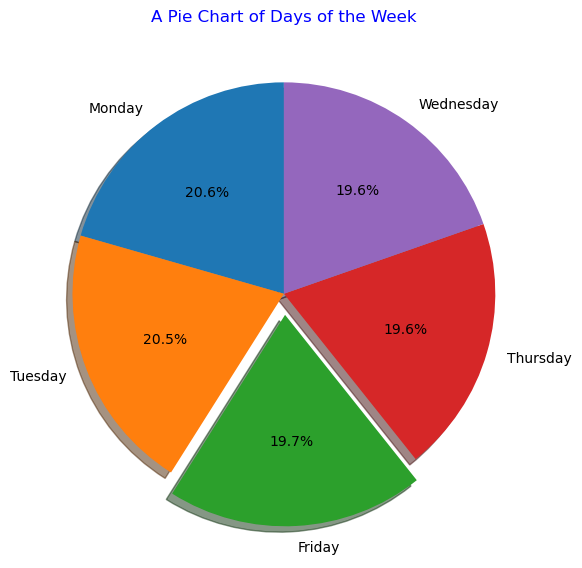

In [141]:
#We can look at the number of days represented on a piechart
accounts = df['day_of_week'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(7,7), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0,0.1,0,0), shadow=True, startangle=90)
plt.title('A Pie Chart of Days of the Week', color='Blue')
plt.show()

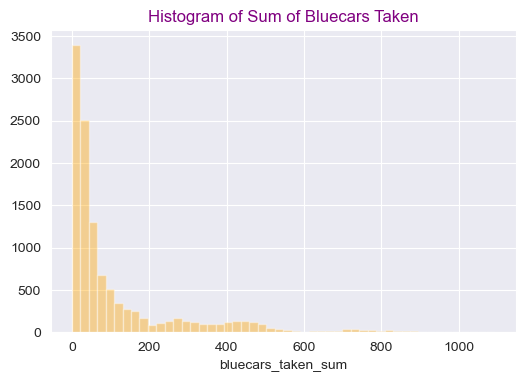

In [156]:
#We can represent the number of blue cars taken with a histogram
plt.figure(dpi = 100)
sns.distplot(df["bluecars_taken_sum"], kde = False, color = 'orange')
plt.title("Histogram of Sum of Bluecars Taken", color = 'purple')
plt.show()

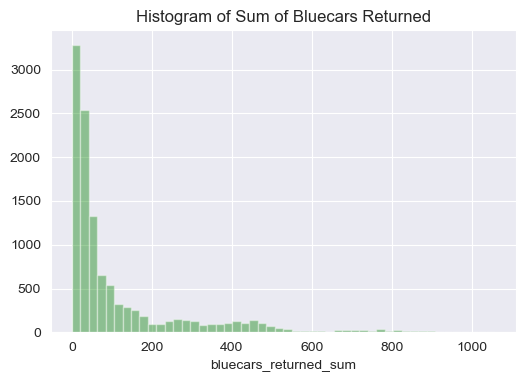

In [153]:
#We can represent the number of blue cars returned with a histogram
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(df["bluecars_returned_sum"], kde = False, color = 'green')
plt.title("Histogram of Sum of Bluecars Returned")
plt.show()

94230    112
94000    112
93600    112
75017    112
75009    112
        ... 
93150    107
93370    105
92340    105
93200     90
93390     59
Name: postal_code, Length: 104, dtype: int64

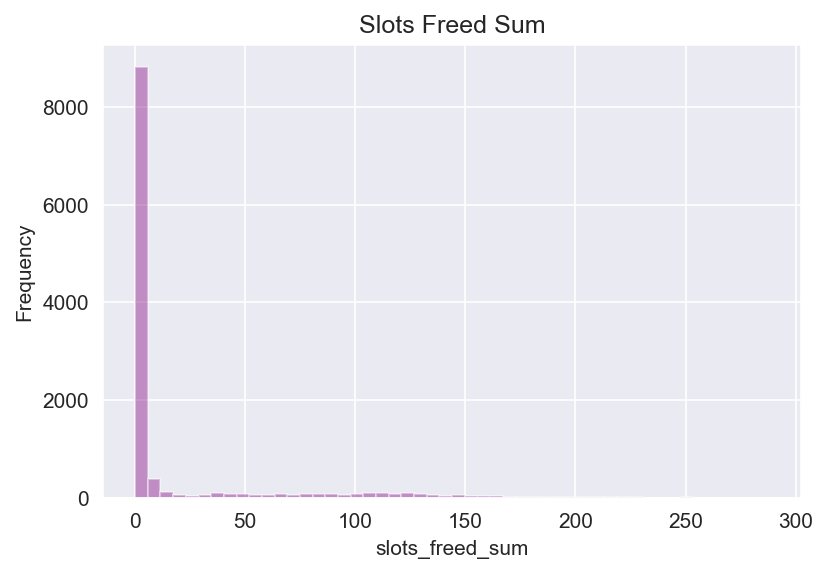

In [158]:
#Information of respondents household sizes
plt.figure(dpi=150)
sns.distplot(df['slots_freed_sum'], kde=False, color='purple')
plt.ylabel('Frequency')
plt.title('Slots Freed Sum')
plt.show()

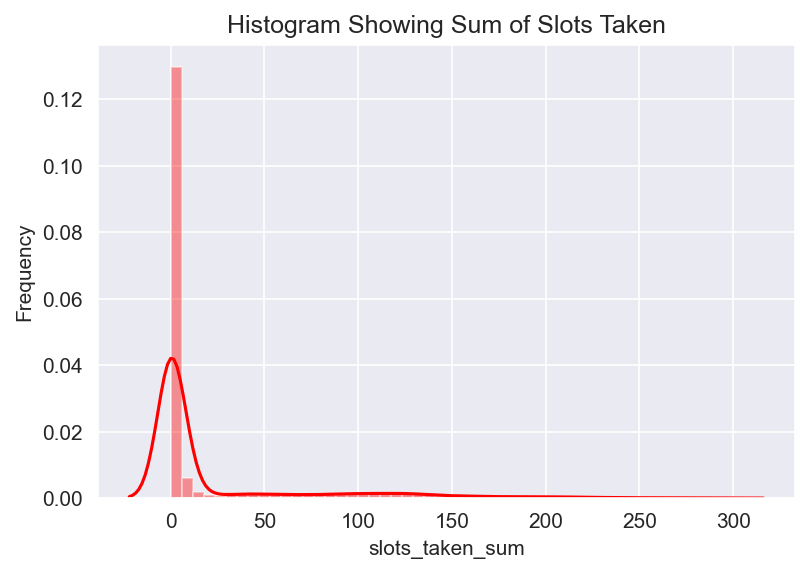

In [159]:
#Information of respondent age
plt.figure(dpi=150)
sns.distplot(df['slots_taken_sum'], kde=True, color='red')
plt.ylabel('Frequency')
plt.title('Histogram Showing Sum of Slots Taken')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

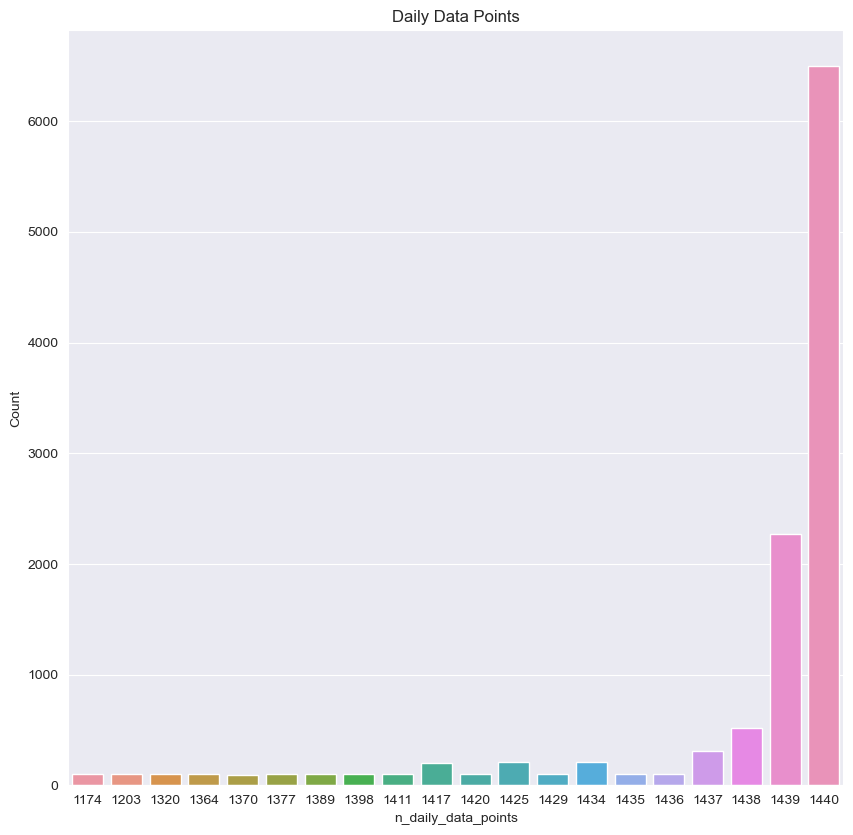

In [176]:
plt.figure(figsize = (10, 10), dpi=100)
sns.countplot(df['n_daily_data_points'])
plt.title('Daily Data Points')
plt.ylabel('Count')
plt.show

### 6.1.2 Measures of Central Tendency 

In [199]:
#We will define the numerical columns as cols to make the work easier
cols = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']

In [200]:
#Finding the mean of numerical values in the dataset
df[cols].mean()

n_daily_data_points      1430.007277
bluecars_taken_sum        116.028673
bluecars_returned_sum     115.639380
slots_freed_sum            20.945166
slots_taken_sum            20.921431
dtype: float64

In [201]:
#Finding the median of numerical values in the dataset
df[cols].median()

n_daily_data_points      1440.0
bluecars_taken_sum         42.0
bluecars_returned_sum      42.0
slots_freed_sum             0.0
slots_taken_sum             0.0
dtype: float64

In [202]:
#Finding the mode of the numerical values
df[cols].mode()

,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,1440,12,12,0,0


In [203]:
#Finding the upper and lower quantiles 
df[cols].quantile([0.25, 0.75])

,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0.25,1439.0,18.0,19.0,0.0,0.0
0.75,1440.0,126.0,126.0,4.0,5.0


In [204]:
#Finding the standard deviation
df[cols].std()

n_daily_data_points       36.882140
bluecars_taken_sum       169.626905
bluecars_returned_sum    168.344751
slots_freed_sum           47.900208
slots_taken_sum           47.848580
dtype: float64

In [205]:
#Looking at the variance 
df[cols].var()

n_daily_data_points       1360.292245
bluecars_taken_sum       28773.286798
bluecars_returned_sum    28339.955275
slots_freed_sum           2294.429896
slots_taken_sum           2289.486593
dtype: float64

In [206]:
#Looking at the skewness
df[cols].skew()

n_daily_data_points     -5.449576
bluecars_taken_sum       2.328198
bluecars_returned_sum    2.328973
slots_freed_sum          2.542187
slots_taken_sum          2.542346
dtype: float64

Only daily data points is skewed to the left. The rest are skewed to the right.

In [207]:
#Looking at the kurtosis of the dataset
df[cols].kurt()

n_daily_data_points      31.654408
bluecars_taken_sum        5.553808
bluecars_returned_sum     5.542863
slots_freed_sum           6.007230
slots_taken_sum           6.001265
dtype: float64

## 6.2 Bivariate Data Analysis

Bivariate Analysis is done to compare two variables. The quantifiable variables in this dataset are age and household size

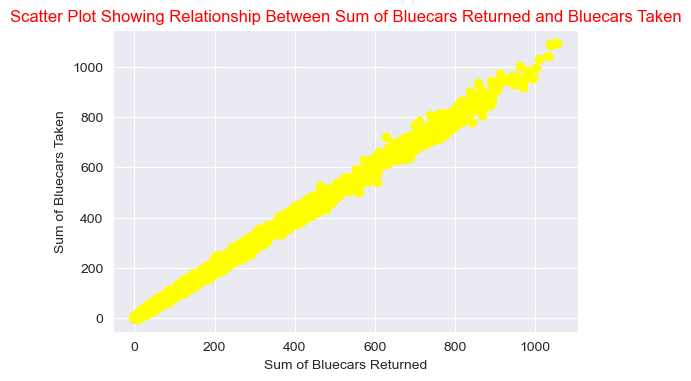

In [215]:
#Scatter plot of bluecars returned and bluecars taken
plt.figure(dpi=100)
plt.scatter(df['bluecars_returned_sum'], df['bluecars_taken_sum'], color='yellow')
plt.xlabel('Sum of Bluecars Returned')
plt.ylabel('Sum of Bluecars Taken')
plt.title('Scatter Plot Showing Relationship Between Sum of Bluecars Returned and Bluecars Taken', color='Red')
plt.show()

It can be seen there is a linear relationship between bluecars returned and bluecars taken

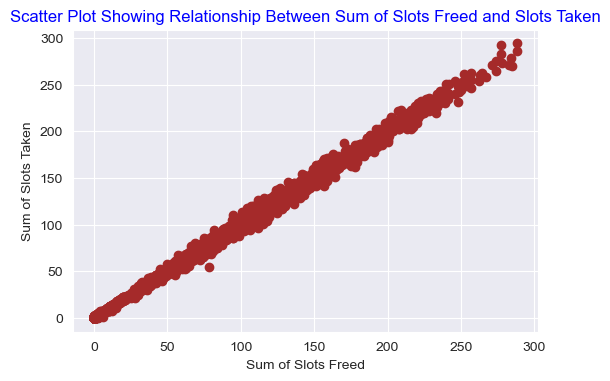

In [220]:
#Scatter plot of charging slots taken and slots freed
plt.figure(dpi=100)
plt.scatter(df['slots_freed_sum'], df['slots_taken_sum'], color='brown')
plt.xlabel('Sum of Slots Freed')
plt.ylabel('Sum of Slots Taken')
plt.title('Scatter Plot Showing Relationship Between Sum of Slots Freed and Slots Taken', color='blue')
plt.show()

There is a relationship between sum of slots taken and sum of slots freed

<AxesSubplot:>

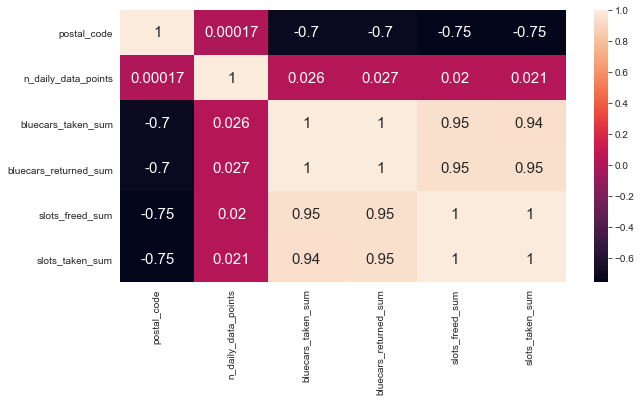

In [246]:
#checking correlation of the entire dataset
corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, annot=True, annot_kws = {'size':15})

# 7. Implementing the Solution

## 7.1 Hypothesis testing

First we define the null and alternate hypothesis.
In this case the claim is that the amount of bluecars taken on Friday is more than taken on Mondays as it is expected that usage is more during weekends.
The null hypothesis is the amount of bluecars taken on Friday is less or equal to that taken on monday.
We will use a significance level of 0.05.
The sampling method will be stratified random sampling taking samples randomly from two strata, Monday and Friday.

In [299]:
#creating a dataset with only monday and friday as the day type
strata = df[df['day_of_week'].isin(['Monday', 'Friday'])]
strata.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20
7,75001,1/8/2018,1438,Monday,weekday,84,83,14,15
11,75001,1/12/2018,1439,Friday,weekday,126,127,11,13
14,75001,1/15/2018,1440,Monday,weekday,107,107,15,15


In [301]:
#Getting shape of the strata
strata.shape

(4645, 9)

In [307]:
strata['day_of_week'].value_counts()

Monday    2374
Friday    2271
Name: day_of_week, dtype: int64

There are 4645 values in the stratas. We will get a sample size using about 10% of the population. We find the ideal sample size is 464. We then randomly select 464 items from the strata.

In [311]:
# Non stratified sample
non_strat_output = strata.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['day_of_week'].value_counts())

Monday    241
Friday    223
Name: day_of_week, dtype: int64


In [314]:
# Stratified sample
strat_output = strata.groupby('day_of_week', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['day_of_week'].value_counts())

# Check the stratified output
strat_output

Monday    237
Friday    227
Name: day_of_week, dtype: int64


,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2297,75015,4/27/2018,1440,Friday,weekday,867,853,235,232
12538,93600,2/9/2018,1439,Friday,weekday,8,9,0,0
8515,92370,4/20/2018,1417,Friday,weekday,21,23,0,0
11917,93370,5/4/2018,1435,Friday,weekday,3,3,0,0
3017,75020,2/23/2018,1440,Friday,weekday,442,413,120,112
...,...,...,...,...,...,...,...,...,...
9853,92800,2/12/2018,1440,Monday,weekday,73,75,9,8
14368,94220,6/18/2018,1440,Monday,weekday,50,50,0,0
4499,92000,5/28/2018,1440,Monday,weekday,171,142,0,0
102,75001,4/16/2018,1440,Monday,weekday,122,122,23,24


We now have a sample in the required proportion.

In [318]:
#Finding mean of bluecars taken stratified sample
mean_bluecars = round(strat_output['bluecars_taken_sum'].mean())

122

In [317]:
#Finding the mean of bluecars taken in the entire population
round(df['bluecars_taken_sum'].mean())

116

In [319]:
#The standard deviation of the population
round(df['bluecars_taken_sum'].std())

170

In [327]:
sd_bluecars = 170/math.sqrt(464)
sd_bluecars

7.892051872524704

In [342]:
#Finding the z-score
zscore = (122-116)/sd_bluecars
print(round(zscore, 5))

0.76026


In [340]:
from scipy import stats
from scipy.stats import norm
alpha = 0.05
prob = 1 - stats.norm.cdf(zscore)
print(round(prob, 3))
if(prob <  alpha):
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

0.224
We fail to reject the null hypothesis


# 8. Challenging the Solution

The solution only finds a trend between Monday and Friday. However, it would be better to get analysis of the whole week

# 9. Follow up Questions

## a) Did we have the right data?

Yes, the dataset is sufficient to answer the question.

## b) Do we need other data to answer our questions?

No, there is no need for other data

## c) Did we have the right question

The question can be changed to include all the days of the week. Sensitivity testing could also be useful